## EDA on geotagged tweets
#### Build basics of extracting key words, sentiments about crowdedness. Label the tweets. Look at frequency of tweets over time. Pay attention to the time the tweet was posted but also when it was referring to. 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
df = pd.read_pickle("../data/01_geotweets_raw_ee.pkl")

In [3]:
df.head()

,date,text,username,day_of_week,hour
date,,,,,
2019-12-31 22:00:04-05:00,2019-12-31 22:00:04-05:00,人还很少 #NYE2020 – at Prospect Park,waynesun09,Tuesday,22
2019-12-31 23:00:44-05:00,2019-12-31 23:00:44-05:00,Baby 出现了，家庭友好的新年庆祝 #NYE2020 #brooklyn #NYC – a...,waynesun09,Tuesday,23
2019-12-31 23:51:00-05:00,2019-12-31 23:51:00-05:00,"""New Year in Space"" Illo for the Washington Po...",dannyhellman,Tuesday,23
2019-12-31 23:52:13-05:00,2019-12-31 23:52:13-05:00,"""New Year Countdown"" Illo for NEW YORK PRESS D...",dannyhellman,Tuesday,23
2020-01-01 00:11:44-05:00,2020-01-01 00:11:44-05:00,2019 再见，2020 新的十年开始。19年还是不错，追求不多所以收获也没多少，只是简单的...,waynesun09,Wednesday,0


In [4]:
# Now set date to be our dataframe's index
df = df.set_index('date', drop = False)

In [5]:
daily_counts = df.text.resample('d').count()

In [6]:
daily_counts.head()

date
2019-12-31 00:00:00-05:00     4
2020-01-01 00:00:00-05:00    14
2020-01-02 00:00:00-05:00     6
2020-01-03 00:00:00-05:00     5
2020-01-04 00:00:00-05:00     8
Freq: D, Name: text, dtype: int64

In [7]:
import pytz
from pytz import timezone
est = pytz.timezone('US/Eastern')
today = dt.datetime.now(est)
startdate = min(df.date)
ticks = pd.date_range(start=startdate,end=today, freq = 'W')

In [8]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(30,5))
plt.plot(daily_counts)
plt.xticks(ticks=ticks,rotation=90)
plt.title("Number of Tweets by Day")
plt.xlabel("date")
plt.ylabel("number of tweets")
plt.savefig("../visualizations/geotweet_count.png", dpi=300, bbox_inches='tight')
plt.show()

/home/eric/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 3000x500 with 1 Axes>

In [9]:
# Localize to US/Eastern time

import pytz
est = timezone('US/Eastern')
crisis_startdate = est.localize(pd.to_datetime("2020-03-23 00:00:00"))
crisis_startdate

Timestamp('2020-03-23 00:00:00-0400', tz='US/Eastern')

In [10]:
len(df[df.date >= crisis_startdate])

327

In [11]:
df_corona = df[df.date >= crisis_startdate]

In [12]:
df_corona.to_pickle("../data/01_geotweets_raw_since_crisis_began_ee.pkl")

In [13]:
# Check out the texts of the first 10 tweets
for i in range(0,10):
    print(i, ':', df_corona.iloc[i].date, ':', df_corona.iloc[i].text, ":", df_corona.iloc[i].username)

0 : 2020-03-23 00:01:25-04:00 : "THE DUDE" HUCKLEBERRY LETTERPRESS Mar 14, 2017 ART DIRECTION BY JUSTIN REYNOLDS #ILLO #ILLUSTRATION #ILLUSTRATOR #FILM #MOVIES #COEN #JEFFBRIDGES #LEBOWSKI #DUDE @Park Slope Historic District https://www.instagram.com/p/B-D96GAjMDY/?igshid=12mhs0kb1zs0s : dannyhellman
1 : 2020-03-23 00:04:33-04:00 : "E PLURIBUS DOLEMITE" TOWER RECORDS' PULSE MAGAZINE May 1, 1996 ART DIRECTION BY NED HAMMAD #ILLO #ILLUSTRATION #ILLUSTRATOR #COMEDY #BLAXPLOITATION #CLINTON #DOLE #DOLEMITE #RUDYRAYMOORE #PRESIDENT #WHITEHOUSE… https://www.instagram.com/p/B-D-RAJDNSH/?igshid=6jnjpsapzhoz : dannyhellman
2 : 2020-03-23 00:12:56-04:00 : "EARBUD HORROR" REVOLVER Jun 30, 2014 ART DIRECTION BY STEPHEN GOGGI #ILLO #ILLUSTRATION #ILLUSTRATOR #MUSIC #IPOD #MP3 @Park Slope Historic District https://www.instagram.com/p/B-D_OfZjIAq/?igshid=2cowb8a285te : dannyhellman
3 : 2020-03-23 00:18:54-04:00 : "ECCE JACKO" ROYAL FLUSH Apr 8, 2008 ART DIRECTION BY JOSH BERNSTEIN #ILLO #ILLUSTRATION

#### NOTES:
#### These are all garbage! I looked at everything from Danny Hellman and none of it was informative. Moreover, his materials are posted at weird times on Mondays, throwing off the daily and hourly tweet counts. So we will drop him before calculating these aggregates. 

In [14]:
# Check out the texts of the last 10 tweets:
for i in range(len(df_corona)-10,len(df_corona)):
    print(i, ':', df_corona.iloc[i].date, ':', df_corona.iloc[i].text, ":", df_corona.iloc[i].username)

317 : 2020-04-19 11:50:14-04:00 : Hermit Thrush, @prospect_park. Day 25 of posting photos I’ve taken of NYC wildlife #bird #birdbk #animals #wildlife #wildlifephotography #leica #leicaphotography #urbanphotography #instabird #birdnerd #nycnature #natureblogger #ebird #nycparks #birdphotography #birdstagram – at Prospect Park : allieri
318 : 2020-04-19 12:55:07-04:00 : A #socialdistancing walk to Prospect Park's #Maryland400 Monument this anniversary of the start of American Revolution in 1775. This was part of our #BattleofBK Ruck March last August, which we'll hold again when safe. Put on your mask &amp; get a little air &amp; sun today if you can! – at Prospect Park : NYCVetsAlliance
319 : 2020-04-19 13:23:30-04:00 : Morning trip to park w/ #peteypiro @The Nethermead https://www.instagram.com/p/B_K7KT-hyhc/?igshid=166pjjurpcpjp : scottpiro
320 : 2020-04-19 13:28:25-04:00 : Just posted a photo @Prospect Park https://www.instagram.com/p/B_K7ufBB2XL/?igshid=d231mxyvtb23 : scottpiro
321 

In [15]:
import re
distancing = []
for i in range(0,len(df_corona)):
    if re.match('.*(distancing)|(packed)|(crowd)|(busy)|(full)|(empty)|(quarantine).*',df_corona.iloc[i].text):
        distancing.append(1)

In [16]:
print("So far, there have been",len(distancing),"tweets related to the crowding level in Prospect Park.")

So far, there have been 25 tweets related to the crowding level in Prospect Park.


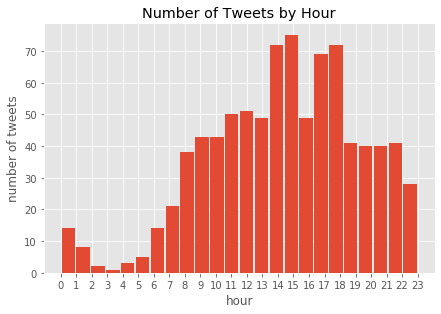

In [17]:
xticks=pd.Series(range(0,24))

df_nohellman = df[df.username != 'dannyhellman']

plt.hist(df_nohellman.hour, bins=24, rwidth=0.9)
plt.xticks(ticks=xticks)
plt.tight_layout()
plt.title("Number of Tweets by Hour")
plt.xlabel("hour")
plt.ylabel("number of tweets")
plt.savefig("../visualizations/geotweets_by_hr.png", dpi=300, bbox_inches='tight')
plt.show()

In [18]:
# Graph tweet counts by hour, separating out the different days as different lines. 

days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
counts = {}

for day in days:
    day_df = df_nohellman[df_nohellman.day_of_week == day]
    day_count = np.zeros(24).astype('int')
    
    for i in range(0,24):
        day_count[i] = len(day_df[day_df.hour == i])

    counts[day] = day_count

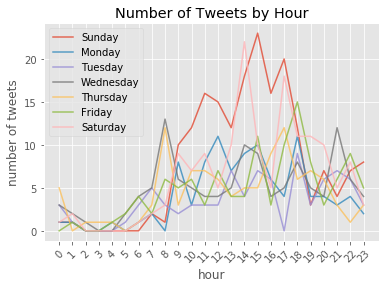

In [19]:
for day in days:
    plt.plot(counts[day],alpha=0.8)
    
plt.legend(days, loc='upper left')

# yticks=pd.Series(range(0,20))
xticks=pd.Series(range(0,24))
plt.xticks(ticks=xticks,rotation=45)
plt.xlabel("hour")
plt.ylabel("number of tweets")
plt.title("Number of Tweets by Hour")       
plt.savefig("../visualizations/geotweets_by_hr_day.png", dpi=300, bbox_inches='tight')
plt.show()

In [20]:
## Double check that these hours are correct -- time zone
## make a plot with hr on the x and # tweets on y, w line for each day of week

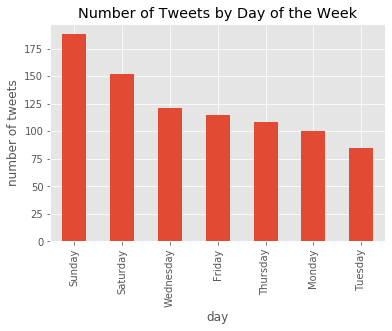

In [21]:
df_nohellman['day_of_week'].value_counts().plot(kind='bar')
plt.title("Number of Tweets by Day of the Week")
plt.xlabel("day")
plt.ylabel("number of tweets")
plt.savefig("../visualizations/geotweets_by_day.png", dpi=300, bbox_inches='tight')
plt.show()